# Goal


This project provided a detailed overview of a customer analysis.The data can be build a model to analyze customer behavior and classify them for campaign acceptanc.
Data Dictionary


# Data Dictionary

People

    ● ID: Customer's unique identifier
    ● Year_Birth: Customer's birth year 
    ● Education: Customer's education level
    ● Marital_Status: Customer's marital status 
    ● Income: Customer's yearly household income 
    ● Kidhome: Number of children in customer's household 
    ● Teenhome: Number of teenagers in customer's household 
    ● Dt_Customer: Date of customer's enrollment with the company 
    ● Recency: Number of days since customer's last purchase 
    ● Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

    ● MntWines: Amount spent on wine in last 2 years 
    ● MntFruits: Amount spent on fruits in last 2 years
    ● MntMeatProducts: Amount spent on meat in last 2 years 
    ● MntFishProducts: Amount spent on fish in last 2 years 
    ● MntSweetProducts: Amount spent on sweets in last 2 years 
    ● MntGoldProds: Amount spent on gold in last 2 years

Promotion

    ● NumDealsPurchases: Number of purchases made with a discount 
    ● AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise 
    ● AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise 
    ● AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise 
    ● AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise 
    ● AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise 
    ● Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

    ● NumWebPurchases: Number of purchases made through the company’s website 
    ● NumCatalogPurchases: Number of purchases made using a catalogue 
    ● NumStorePurchases: Number of purchases made directly in stores 
    ● NumWebVisitsMonth: Number of visits to company’s website in the last month


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Exploratory Data Analysis (EDA)

In [3]:
df = pd.read_csv("customer_train.csv",sep=",")
df

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,1675,1675,4712,1991,D3,Bertunangan,20193000.0,0,0,28-11-2012,18,8000,8000,22000,24000,11000,9000,1,1,1,4,4,0,0,0,0,0,0,3,11,0
1676,1676,1676,1170,1975,S1,Menikah,27573000.0,1,0,25-03-2013,45,50000,15000,110000,39000,15000,15000,4,5,1,4,8,0,0,0,0,0,0,3,11,0
1677,1677,1677,6347,1979,SMA,Lajang,15862000.0,1,0,27-06-2013,26,1000,1000,4000,11000,9000,10000,1,1,0,3,8,0,0,0,0,0,0,3,11,0
1678,1678,1678,4065,1976,S3,Menikah,49544000.0,1,0,12-02-2013,0,308000,0,73000,0,0,23000,2,5,1,8,7,0,0,0,0,0,0,3,11,0


# Data understanding

In [4]:
df.shape

(1680, 31)

In [5]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Year_Birth', 'Education',
       'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
df.dtypes

Unnamed: 0.1             int64
Unnamed: 0               int64
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntCoke                  int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [7]:
df.drop(['Unnamed: 0.1'],axis=1,inplace=True)
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
df.shape

(1680, 29)

# Handling Missing Values

In [9]:
df.isnull().sum() 

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 17
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [10]:
df = df.dropna() #drop the null values

In [11]:
df.isnull().sum() 

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [12]:
df.duplicated().sum() 

0

# Data Feature


In [13]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 1663 entries, 0 to 1679
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1663 non-null   int64  
 1   Year_Birth           1663 non-null   int64  
 2   Education            1663 non-null   object 
 3   Marital_Status       1663 non-null   object 
 4   Income               1663 non-null   float64
 5   Kidhome              1663 non-null   int64  
 6   Teenhome             1663 non-null   int64  
 7   Dt_Customer          1663 non-null   object 
 8   Recency              1663 non-null   int64  
 9   MntCoke              1663 non-null   int64  
 10  MntFruits            1663 non-null   int64  
 11  MntMeatProducts      1663 non-null   int64  
 12  MntFishProducts      1663 non-null   int64  
 13  MntSweetProducts     1663 non-null   int64  
 14  MntGoldProds         1663 non-null   int64  
 15  NumDealsPurchases    1663 non-null   int64 

In [14]:
# chenging the datatype of Dt_Customer
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [15]:
#Create a column "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.
df['Age'] = 2015 - df['Year_Birth']

In [16]:
#Create a column "Spent" indicating the total amount spent by the customer in various categories overthe span of two years.
df['Spent'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']


In [17]:
# Number of companies in which the client accepted the offer
df['No_Accepted_Cmp'] = df['AcceptedCmp1'] +df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] +df['AcceptedCmp5'] + df['Response']


In [18]:
#Total number of purchases
df['No_Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [19]:
df['Marital_Status'].value_counts()

Marital_Status
Menikah        644
Bertunangan    434
Lajang         353
Cerai          177
Janda           52
Duda             3
Name: count, dtype: int64

In [20]:
Marital_Status_mapping = {
    'Menikah': 0,
    'Bertunangan': 1,
    'Lajang': 2,
    'Cerai': 3,
    'Janda': 4,
    'Duda' : 5
}

df['Marital_Status'] = df['Marital_Status'].map(Marital_Status_mapping)

In [21]:
df['Education'].value_counts()

Education
S1     825
S3     369
S2     277
D3     157
SMA     35
Name: count, dtype: int64

In [22]:
education_mapping = {
    'S1': 0,
    'S3': 1,
    'S2': 2,
    'D3': 3,
    'SMA': 4
}

df['Education'] = df['Education'].map(education_mapping)

In [23]:
#Create a feature "Children" to indicate total children in a household that is, kids and teenagers.
df['Children'] = df['Kidhome'] + df['Teenhome']

In [24]:
#To get further clarity of household, Creating feature indicating "Family_Size"
df['Family_Size'] = df['Marital_Status'] + df['Children']

In [25]:
#Create a feature "Is_Parent" to indicate parenthood status
df['Is_Parent'] = np.where(df.Children > 0, 1, 0)

In [26]:
#Dropping some of the redundant features
to_drop = ['ID','Year_Birth','Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue']
df = df.drop(to_drop, axis=1)

# Data Analysis and Visualization

In [27]:
df.describe()

,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,No_Accepted_Cmp,No_Total_Purchases,Children,Family_Size,Is_Parent
count,1663.000000,1.663000e+03,1663.000000,1663.000000,1663.000000,1.663000e+03,1663.000000,1.663000e+03,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1.663000e+03,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000
mean,0.922429,5.201434e+07,0.449188,0.499098,49.061335,3.060469e+05,25978.352375,1.664546e+05,37110.042093,26979.555021,43331.328924,2.338545,4.038485,2.682502,5.797956,5.331930,0.072159,0.073963,0.069753,0.061936,0.012026,0.010222,0.145520,46.150932,6.059008e+05,0.435358,12.518942,0.948286,2.087192,0.710162
std,1.106537,2.148248e+07,0.544890,0.549449,28.914182,3.392420e+05,39576.041604,2.248949e+05,54348.868950,41273.567857,50904.197540,1.956260,2.616657,2.980317,3.245112,2.451058,0.258828,0.261789,0.254808,0.241112,0.109037,0.100618,0.352731,12.037325,6.027183e+05,0.879914,7.168639,0.759834,1.355196,0.453823
min,0.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,5.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.568800e+07,0.000000,0.000000,24.000000,2.400000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,6.950000e+04,0.000000,6.000000,0.000000,1.000000,0.000000
50%,1.000000,5.125000e+07,0.000000,0.000000,50.000000,1.730000e+05,8000.000000,6.800000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,3.930000e+05,0.000000,12.000000,1.000000,2.000000,1.000000
75%,2.000000,6.812200e+07,1.000000,1.000000,74.000000,4.990000e+05,32000.000000,2.345000e+05,48000.000000,32000.000000,55000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,1.043500e+06,1.000000,18.000000,1.000000,3.000000,1.000000
max,4.000000,1.623970e+08,2.000000,2.000000,99.000000,1.492000e+06,199000.000000,1.725000e+06,259000.000000,198000.000000,262000.000000,15.000000,11.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,122.000000,2.525000e+06,5.000000,32.000000,3.000000,7.000000,1.000000


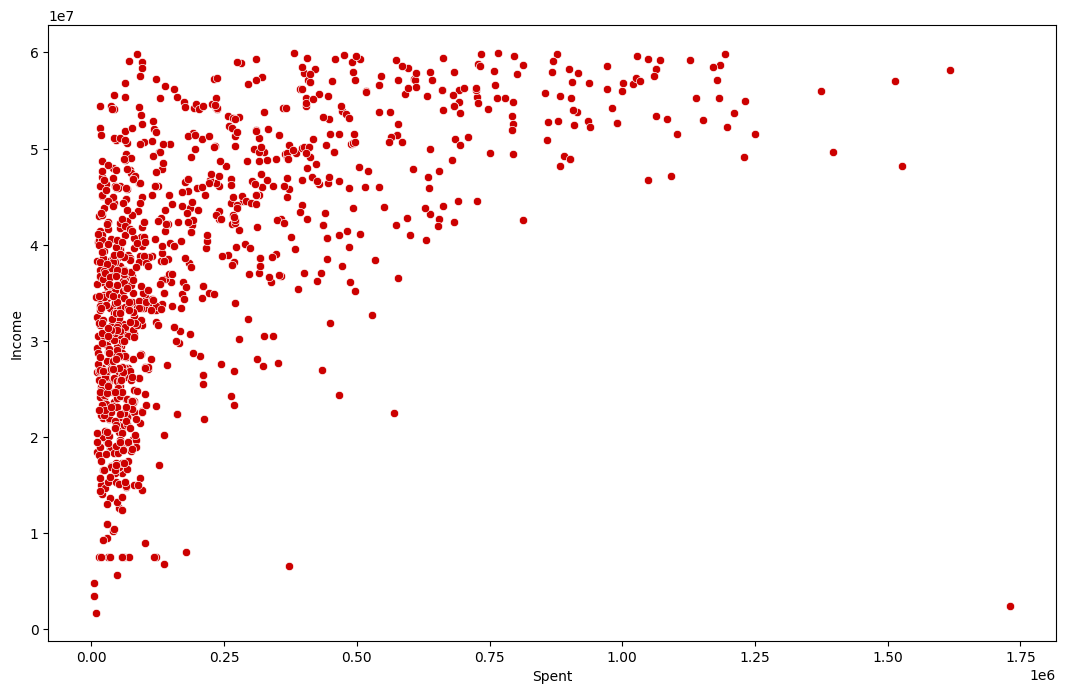

In [28]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=df[df['Income']<60000000]['Spent'], y=df[df['Income']<60000000]['Income'], color='#cc0000');


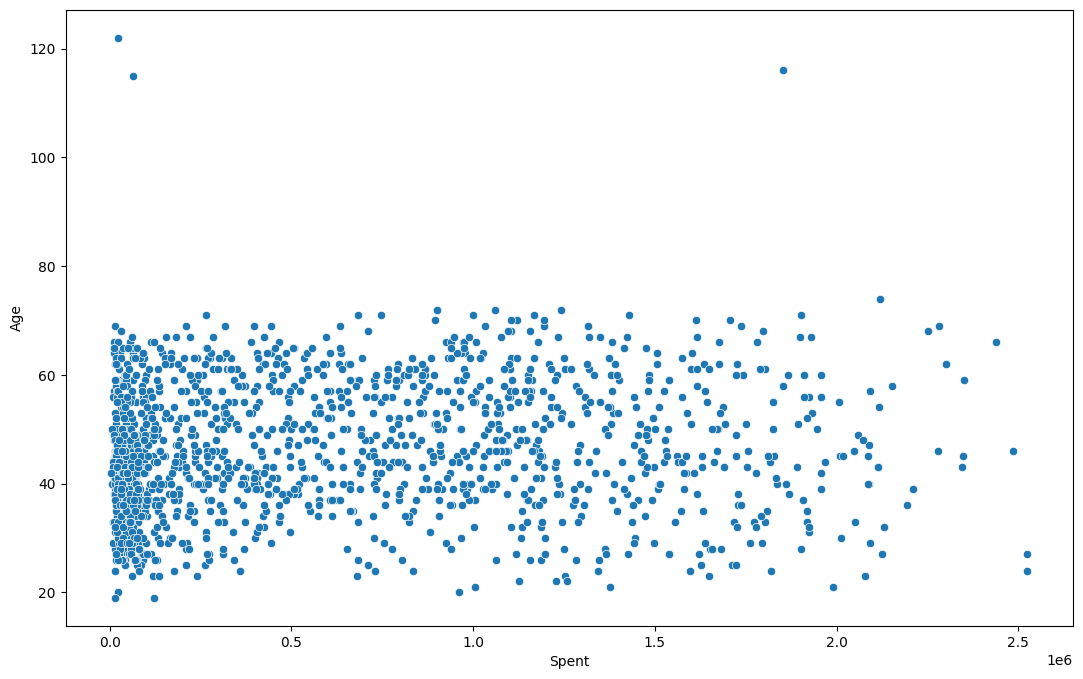

In [29]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=df['Spent'], y=df['Age']);

<Axes: xlabel='Spent', ylabel='Count'>

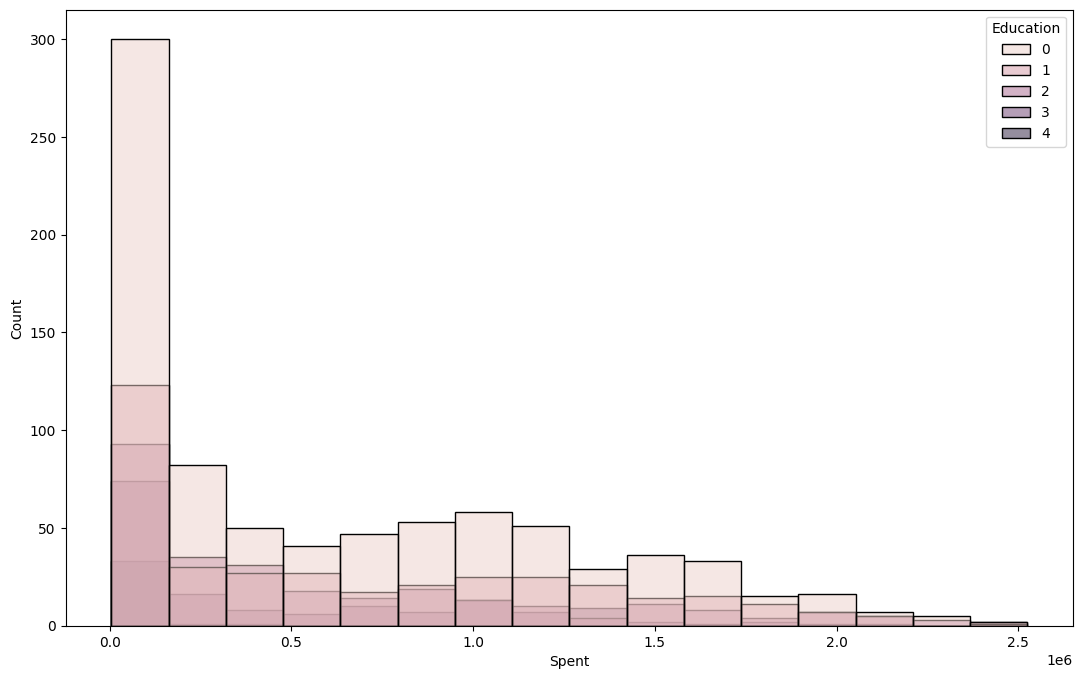

In [30]:
plt.figure(figsize=(13,8))
sns.histplot(x=df['Spent'], hue=df['Education'])

The presence of outliers in a classification or regression dataset can result in a poor fit and lower predictive modeling performance, therefore we should see there are ouliers in the data.


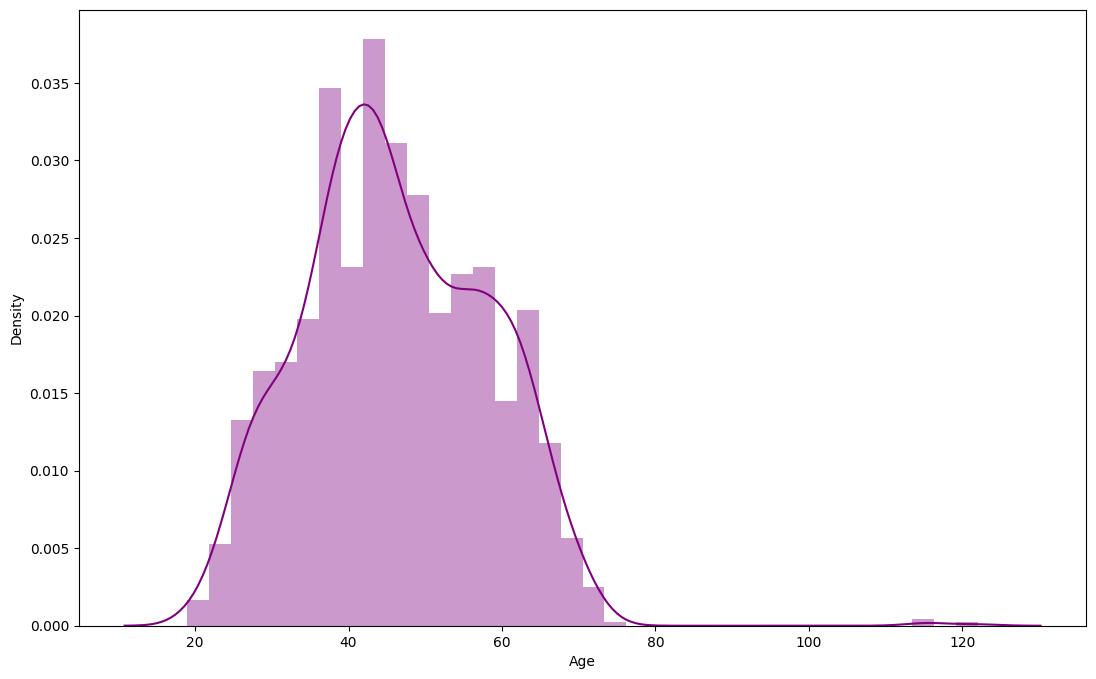

In [31]:
plt.figure(figsize=(13,8))
sns.distplot(df.Age, color='purple');

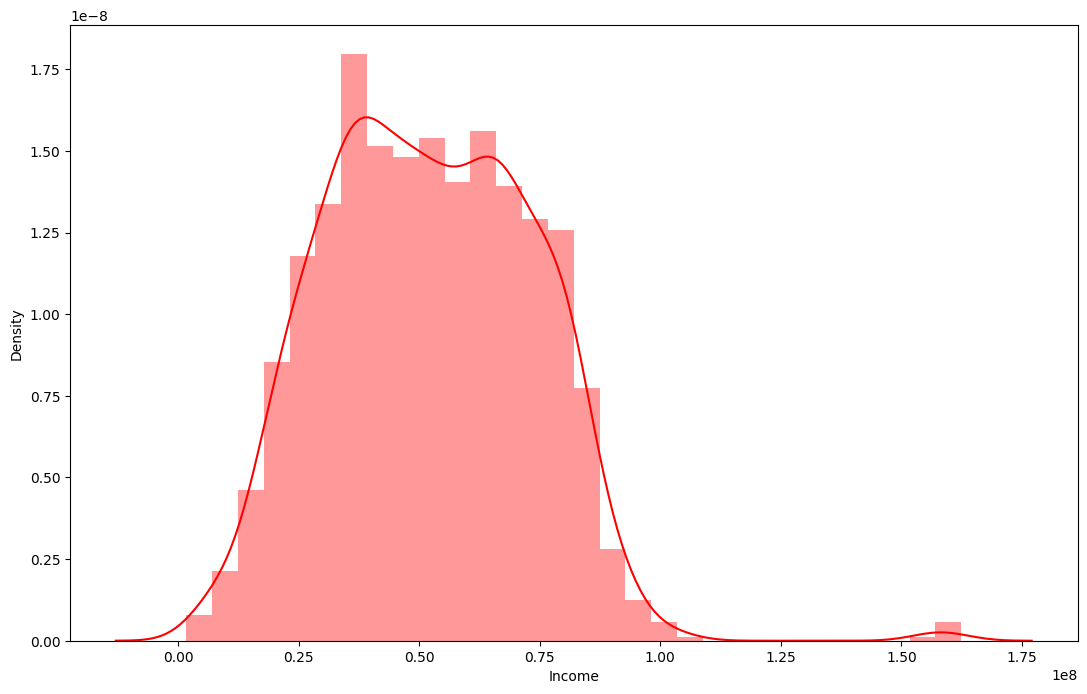

In [32]:
plt.figure(figsize=(13,8))
sns.distplot(df.Income, color='Red');

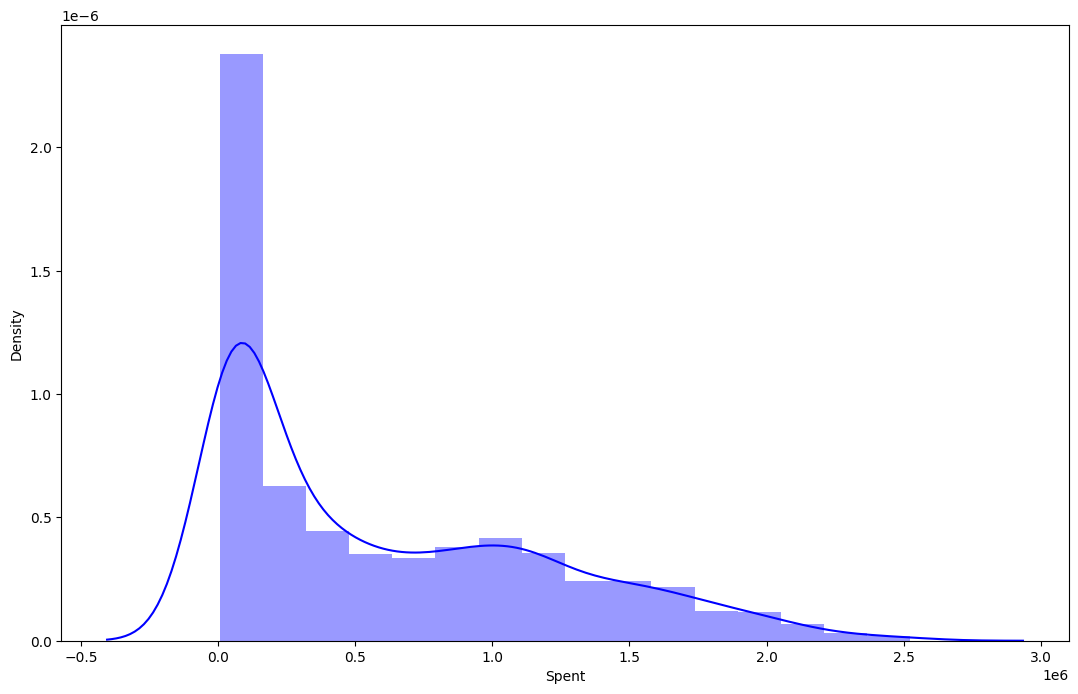

In [33]:
plt.figure(figsize=(13,8))
sns.distplot(df.Spent, color='Blue');

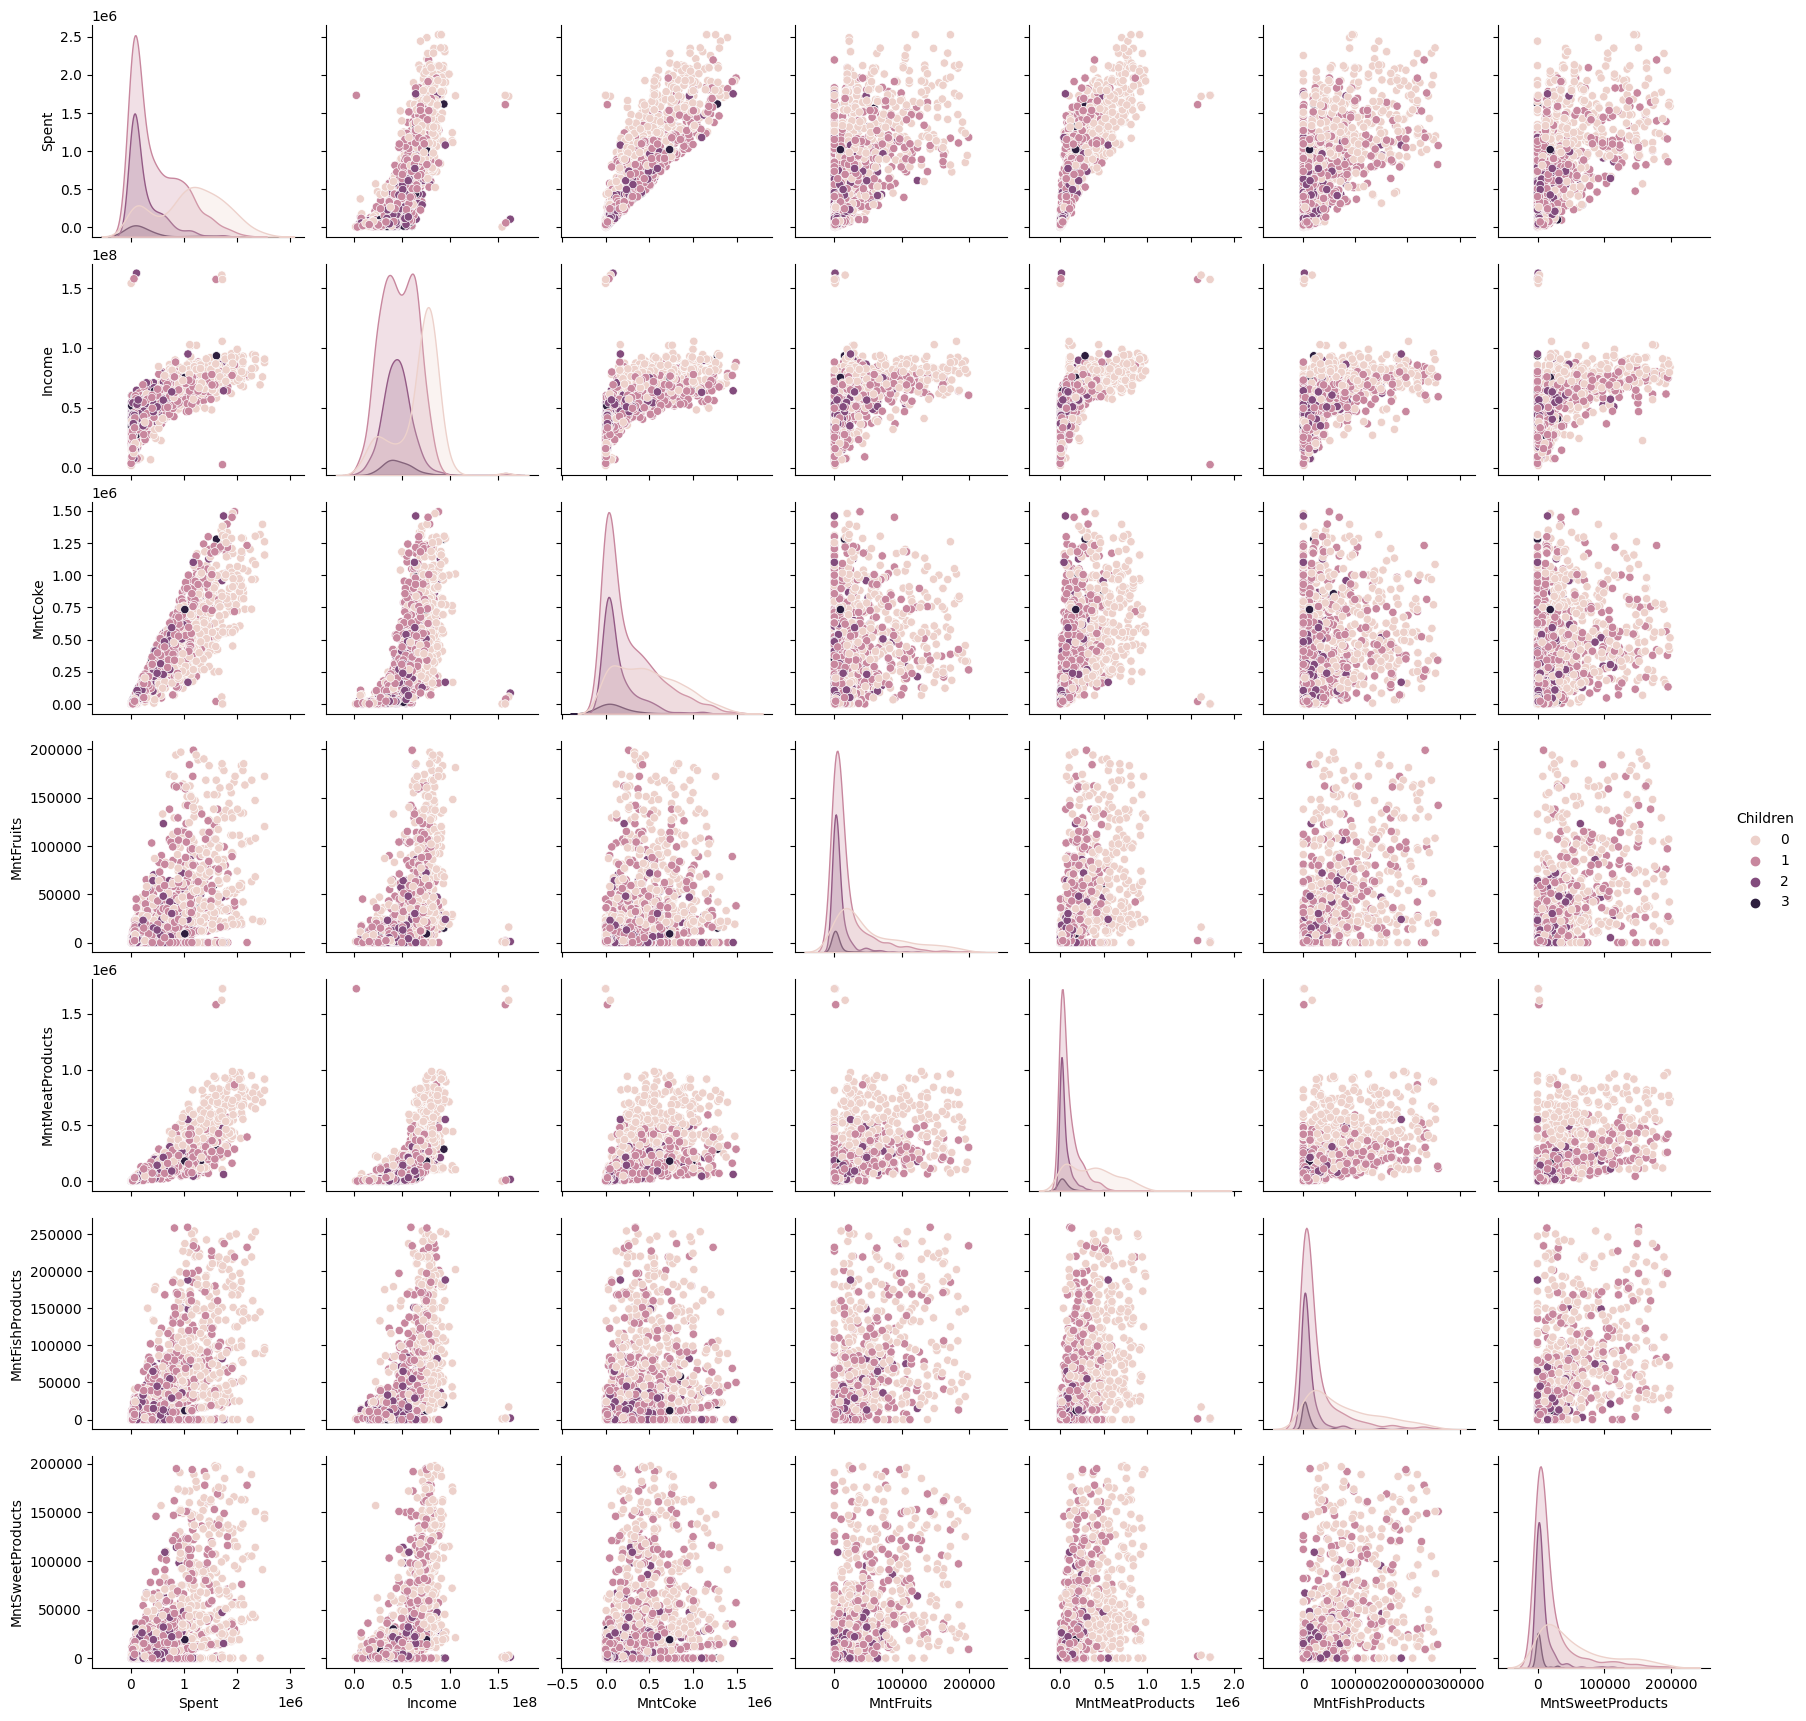

In [34]:
#Scatter plot between the variables
sns.pairplot(df,vars=['Spent','Income','MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts'],hue='Children')
plt.show()


<Axes: >

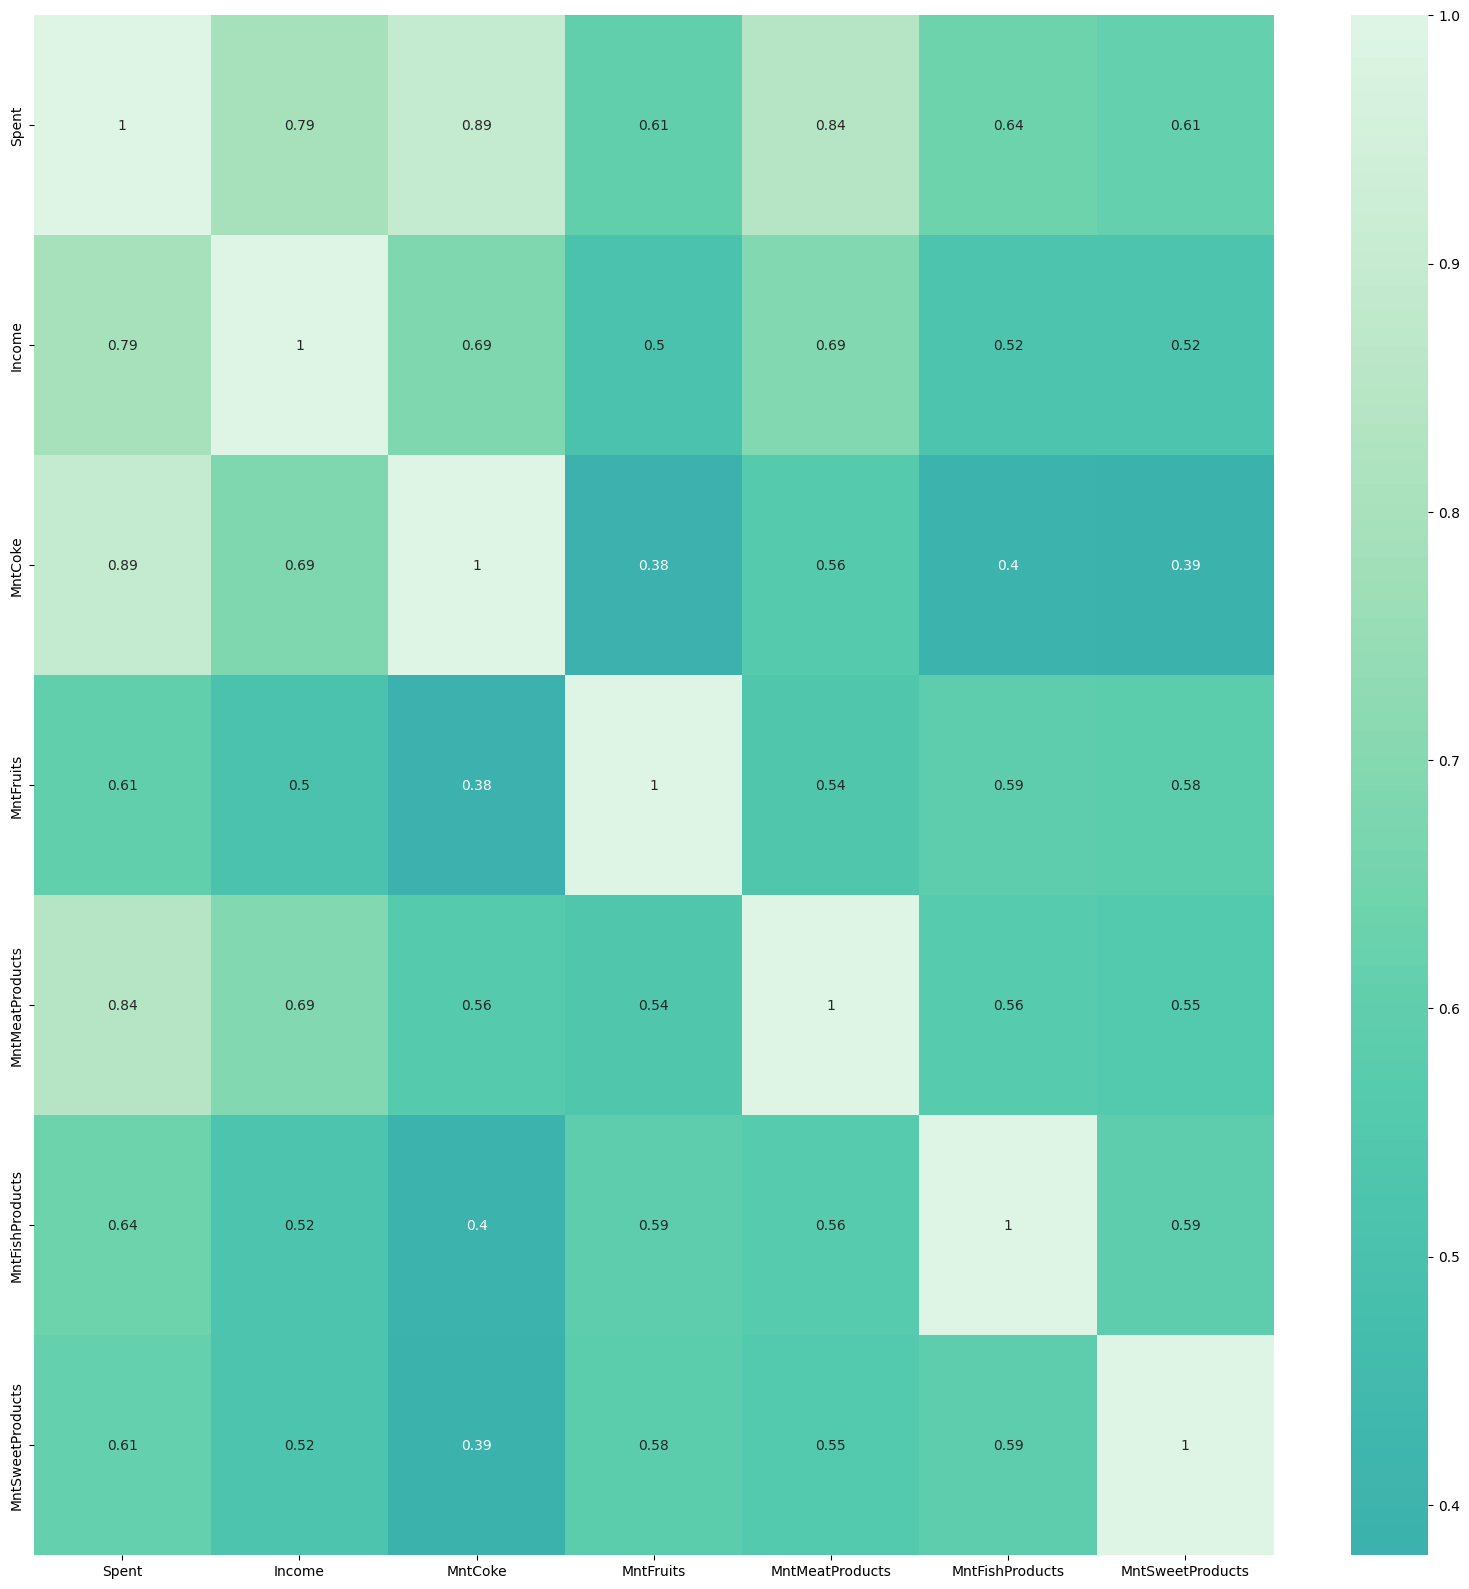

In [35]:
corr_matrix=df[['Spent','Income','MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].corr() 

plt.figure(figsize=(20,20))  
sns.heatmap(corr_matrix, annot = True, cmap = 'mako', center = 0)

# Feature Scaling

In this section, numerical features are scaled.


In [36]:
scalar = StandardScaler()  
scaled_df = pd.DataFrame(scalar.fit_transform(df), columns=df.columns)
scaled_df.head()

,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,No_Accepted_Cmp,No_Total_Purchases,Children,Family_Size,Is_Parent
0,-0.833869,0.285139,-0.824613,-0.908634,0.309238,0.969963,1.567623,1.688165,2.482674,1.478884,0.877769,0.338224,1.514416,2.456014,-0.554217,0.680756,-0.278874,-0.282613,-0.273832,-0.256955,-0.110331,-0.101627,2.423201,0.984657,1.678070,0.641895,1.322972,-1.248393,-0.064358,-1.565314
1,-0.833869,-0.264031,1.011172,0.911918,-0.382672,-0.869986,-0.631338,-0.713680,-0.646207,-0.629637,-0.733585,-0.173109,-1.161558,-0.564708,-1.170714,-0.135464,-0.278874,-0.282613,-0.273832,-0.256955,-0.110331,-0.101627,-0.412677,1.233956,-0.960772,-0.494922,-1.188720,1.384552,1.411887,0.638850
2,-0.833869,0.912583,-0.824613,-0.908634,-0.797819,0.353698,0.581882,-0.175489,1.359958,-0.144920,-0.026161,-0.684442,1.514416,-0.229072,1.295274,-0.543574,-0.278874,-0.282613,-0.273832,-0.256955,-0.110331,-0.101627,-0.412677,0.319857,0.282305,-0.494922,1.043895,-1.248393,-0.802481,-1.565314
3,-0.833869,-1.181241,1.011172,-0.908634,-0.797819,-0.869986,-0.555512,-0.651410,-0.498965,-0.581165,-0.753236,-0.173109,-0.779276,-0.900343,-0.554217,0.272646,-0.278874,-0.282613,-0.273832,-0.256955,-0.110331,-0.101627,-0.412677,-1.259041,-0.917621,-0.494922,-0.909643,0.068080,-0.064358,0.638850
4,0.070123,0.292357,1.011172,-0.908634,1.554676,-0.392307,0.430229,-0.215519,0.163621,0.000496,-0.556729,1.360890,0.367570,0.106564,0.062280,-0.135464,-0.278874,-0.282613,-0.273832,-0.256955,-0.110331,-0.101627,-0.412677,-1.009742,-0.305211,-0.494922,0.206665,0.068080,-0.802481,0.638850


# Building Classification and Clustering Models:

In [37]:
x=df.drop(['Response'],axis=1) 
y=df[['Response']]
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Measure accuracy of our model

In [38]:
model.fit(X_train, y_train)

LogisticRegression()

In [39]:
model.score(X_test, y_test)

0.8498498498498499

In [40]:
# Fit a Decision Tree model as comparison
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.960960960960961

In [41]:
# Fit a Random Forest model, " compared to "Decision Tree model, accuracy go up by 5%

rclf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9669669669669669

In [42]:
# Fit a AdaBoost model, " compared to "Decision Tree model, accuracy go up by 10%
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.993993993993994

In [43]:
#  Fit a Gradient Boosting model, " compared to "Decision Tree model, accuracy go up by 10%
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.987987987987988

In [44]:
import xgboost as xgb
my_model = xgb.XGBClassifier()
my_model.fit(X_train, y_train)
y_pred = my_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.984984984984985

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel = 'linear', C = 1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

# Classification_Report

In [99]:
from sklearn.metrics import classification_report

# Assuming 'model' is your classification model and 'X_test', 'y_test' are your test data
y_pred = model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       284
           1       0.40      0.04      0.07        49

    accuracy                           0.85       333
   macro avg       0.63      0.52      0.50       333
weighted avg       0.79      0.85      0.79       333



the model performs well for class 0 but needs improvement in identifying class 1. Depending on the context, further model tuning or data balancing techniques may be necessary.

In [49]:

# Assuming 'model' is your classification model
y_pred_model = model.predict(X_test)

# Calculate metrics for 'model'
accuracy_model = accuracy_score(y_test, y_pred_model)
precision_model = precision_score(y_test, y_pred_model)
recall_model = recall_score(y_test, y_pred_model)
f1_model = f1_score(y_test, y_pred_model)

# Print the metrics
print(f"Metrics for Model:")
print(f"Accuracy: {accuracy_model:.4f}")
print(f"Precision: {precision_model:.4f}")
print(f"Recall: {recall_model:.4f}")
print(f"F1-score: {f1_model:.4f}")



Metrics for Model:
Accuracy: 0.8498
Precision: 0.4000
Recall: 0.0408
F1-score: 0.0741


Dimensionality Reduction

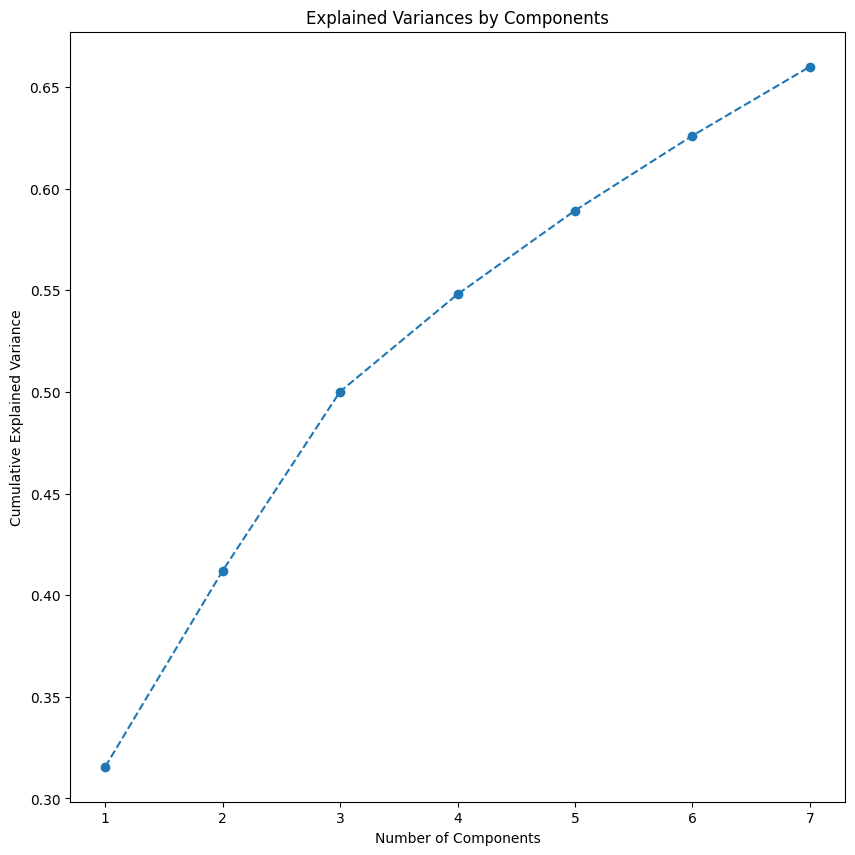

In [81]:
# Assuming data is your original dataset
pca = PCA(n_components=7)  # Specify the number of components you want
pca.fit(scaled_df)
exp_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 10))
plt.plot(range(1, 8), exp_var, marker='o', linestyle='--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [82]:
# find the least number of components that can explain more than 90% variance
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.90):
    print("Number of PCs that explain at least 90% variance: ", ix+1)
    break

Number of PCs that explain at least 90% variance:  3


In [83]:
pca.explained_variance_

array([9.47369182, 2.89430651, 2.64539778, 1.43611425, 1.23690792,
       1.10515333, 1.0190481 ])

In [84]:
pca.explained_variance_ratio_

array([0.31559984, 0.09641887, 0.0881269 , 0.04784169, 0.04120547,
       0.03681629, 0.03394784])

In [86]:
pd.DataFrame(pca.explained_variance_ratio_, index=range(1,8), columns=['Explained Variability'])

,Explained Variability
1,0.315600
2,0.096419
3,0.088127
4,0.047842
5,0.041205
6,0.036816
7,0.033948


In [87]:
pca.explained_variance_ratio_.cumsum()

array([0.31559984, 0.41201871, 0.50014561, 0.5479873 , 0.58919277,
       0.62600906, 0.6599569 ])

In [89]:
df_PCA = pd.DataFrame(pca.transform(df))

In [93]:
df_PCA = pd.DataFrame(pca.transform(df)[:, :2], columns=['col1', 'col2'])

# Finding 'k' value by Elbow Method

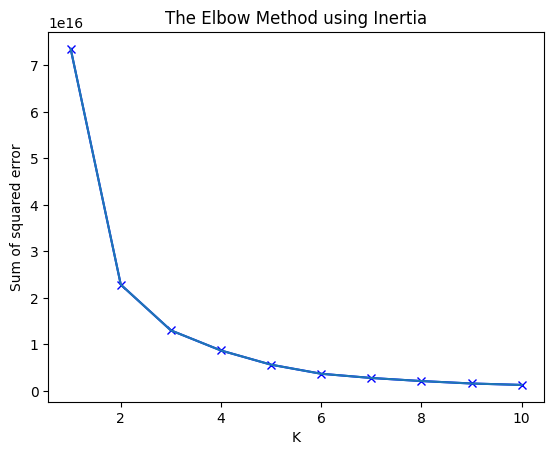

In [94]:
inertia=[]
range_val = range(1,11)
for i in range_val:
    km = KMeans(n_clusters=i)
    km.fit_predict(pd.DataFrame(df_PCA))
    inertia.append(km.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title('The Elbow Method using Inertia')
plt.plot(range_val,inertia)

Model Building using KMeans

In [95]:
kmeans_model = KMeans(3) #k=3
kmeans_model.fit_predict(df_PCA)
pca_df_kmeans= pd.concat([df_PCA,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

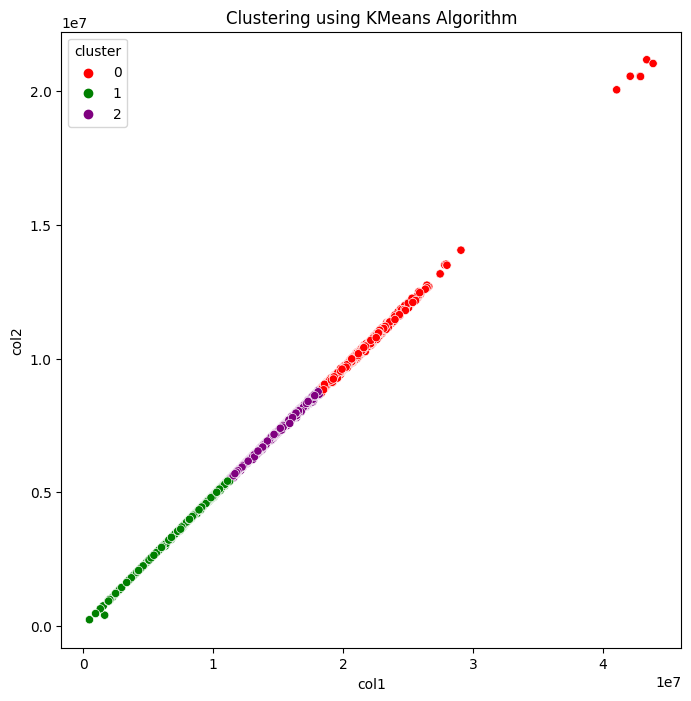

In [96]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x='col1', y='col2',hue='cluster',data=pca_df_kmeans,palette=['red','green','purple'])
plt.title('Clustering using KMeans Algorithm')
plt.show()

In [97]:
#find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df_PCA.columns])
#inverse transform the data
 
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df_PCA.columns])
cluster_centers

,col1,col2
0,2.167770e+07,1.042539e+07
1,7.924959e+06,3.859006e+06
2,1.480905e+07,7.183324e+06


In [100]:
#creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1) #using kmeans_model labels
cluster_df

,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,No_Accepted_Cmp,No_Total_Purchases,Children,Family_Size,Is_Parent,Cluster
0,0.0,58138000.0,0.0,0.0,58.0,635000.0,88000.0,546000.0,172000.0,88000.0,88000.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,58.0,1617000.0,1.0,22.0,0.0,2.0,0.0,2.0
1,0.0,46344000.0,1.0,1.0,38.0,11000.0,1000.0,6000.0,2000.0,1000.0,6000.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0,27000.0,0.0,4.0,2.0,4.0,1.0,2.0
2,0.0,71613000.0,0.0,0.0,26.0,426000.0,49000.0,127000.0,111000.0,21000.0,42000.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,776000.0,0.0,20.0,0.0,1.0,0.0,0.0
3,0.0,26646000.0,1.0,0.0,26.0,11000.0,4000.0,20000.0,10000.0,3000.0,5000.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,53000.0,0.0,6.0,1.0,2.0,1.0,1.0
4,1.0,58293000.0,1.0,0.0,94.0,173000.0,43000.0,118000.0,46000.0,27000.0,15000.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,422000.0,0.0,14.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [101]:
cluster_df_cleaned = cluster_df.dropna()
cluster_df_cleaned 

,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,No_Accepted_Cmp,No_Total_Purchases,Children,Family_Size,Is_Parent,Cluster
0,0.0,58138000.0,0.0,0.0,58.0,635000.0,88000.0,546000.0,172000.0,88000.0,88000.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,58.0,1617000.0,1.0,22.0,0.0,2.0,0.0,2.0
1,0.0,46344000.0,1.0,1.0,38.0,11000.0,1000.0,6000.0,2000.0,1000.0,6000.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0,27000.0,0.0,4.0,2.0,4.0,1.0,2.0
2,0.0,71613000.0,0.0,0.0,26.0,426000.0,49000.0,127000.0,111000.0,21000.0,42000.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,776000.0,0.0,20.0,0.0,1.0,0.0,0.0
3,0.0,26646000.0,1.0,0.0,26.0,11000.0,4000.0,20000.0,10000.0,3000.0,5000.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,53000.0,0.0,6.0,1.0,2.0,1.0,1.0
4,1.0,58293000.0,1.0,0.0,94.0,173000.0,43000.0,118000.0,46000.0,27000.0,15000.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,422000.0,0.0,14.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,3.0,50334000.0,0.0,1.0,24.0,284000.0,16000.0,160000.0,84000.0,16000.0,134000.0,6.0,7.0,4.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,694000.0,0.0,17.0,1.0,2.0,1.0,1.0
1659,0.0,72066000.0,0.0,0.0,55.0,1003000.0,34000.0,536000.0,134000.0,51000.0,34000.0,1.0,4.0,6.0,6.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,34.0,1792000.0,3.0,16.0,0.0,2.0,0.0,1.0
1660,1.0,50729000.0,1.0,1.0,62.0,239000.0,13000.0,143000.0,45000.0,4000.0,52000.0,9.0,6.0,2.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,496000.0,0.0,15.0,2.0,4.0,1.0,1.0
1661,0.0,34916000.0,2.0,0.0,89.0,51000.0,23000.0,82000.0,33000.0,0.0,42000.0,4.0,5.0,1.0,3.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,231000.0,0.0,9.0,2.0,3.0,1.0,2.0


Clusters Analysis and Customers Profiling

<Axes: xlabel='Cluster', ylabel='count'>

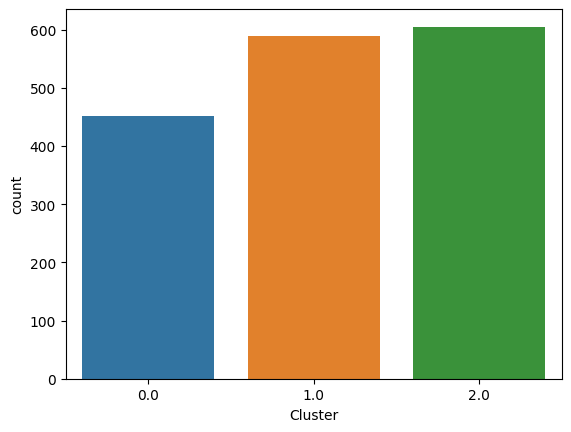

In [102]:
#vishvalization
sns.countplot(x='Cluster', data=cluster_df_cleaned) 

then plot the graphs to understand  hear cluster 2 have high datapoint 

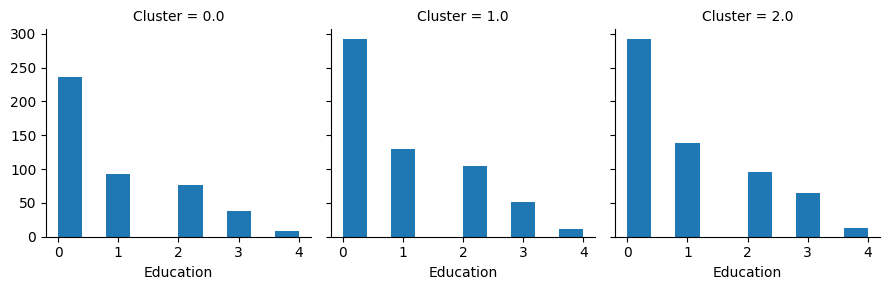

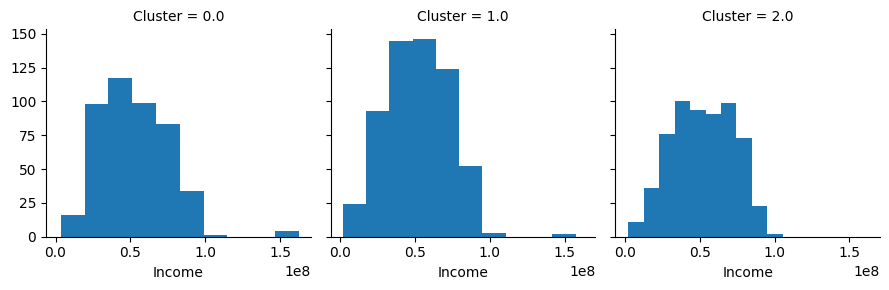

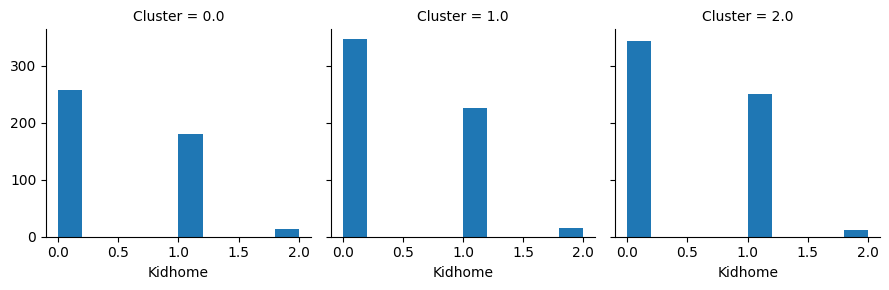

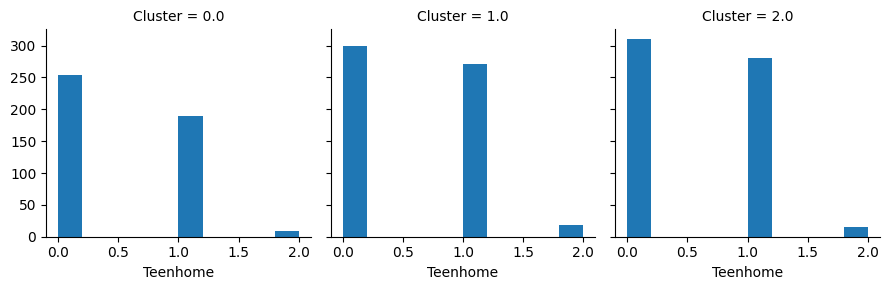

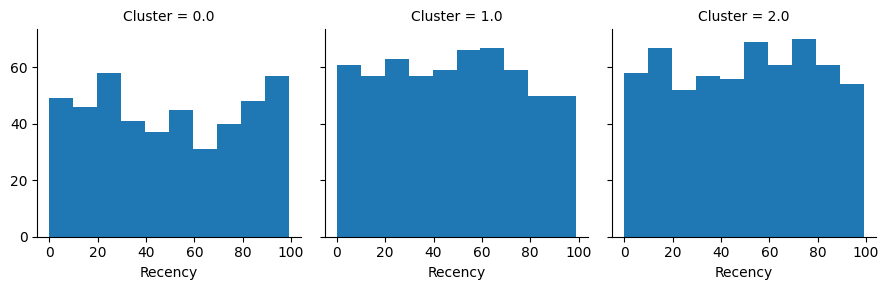

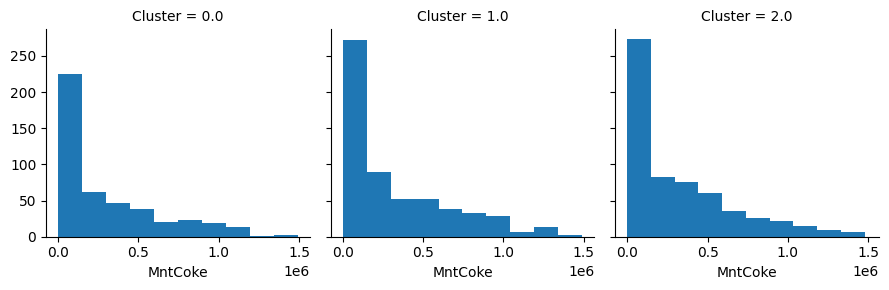

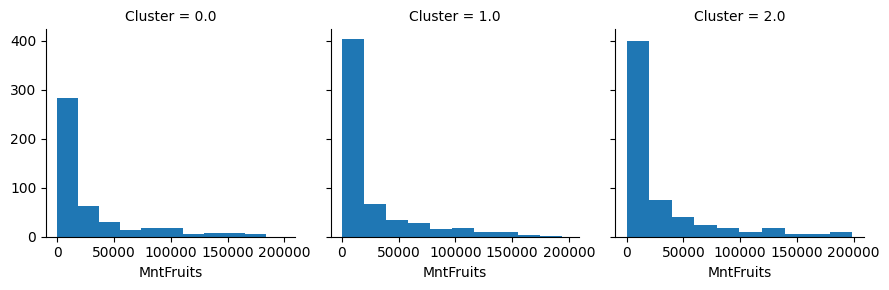

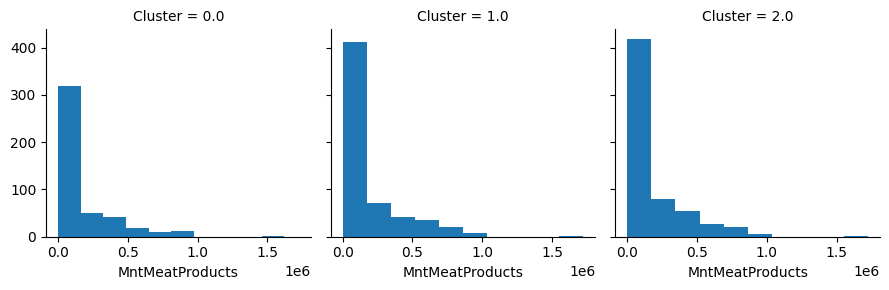

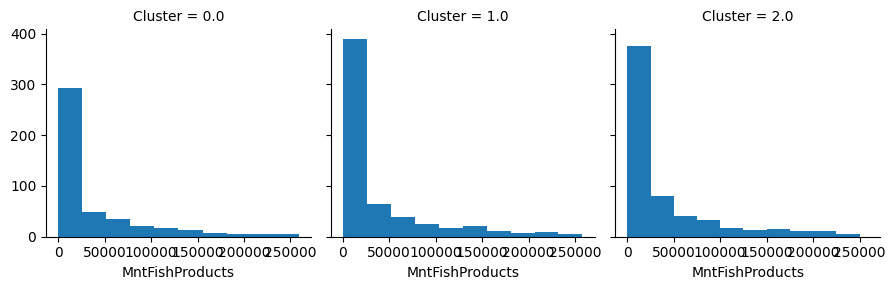

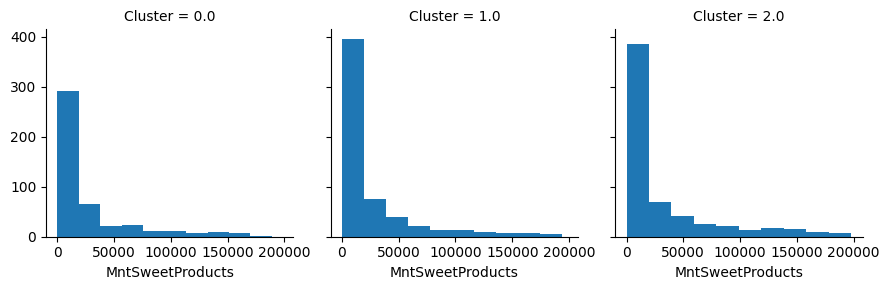

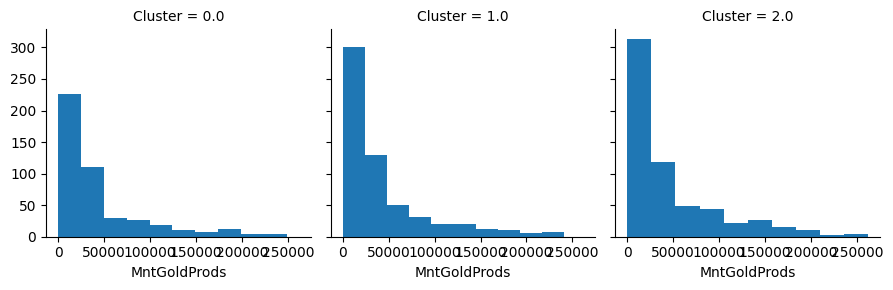

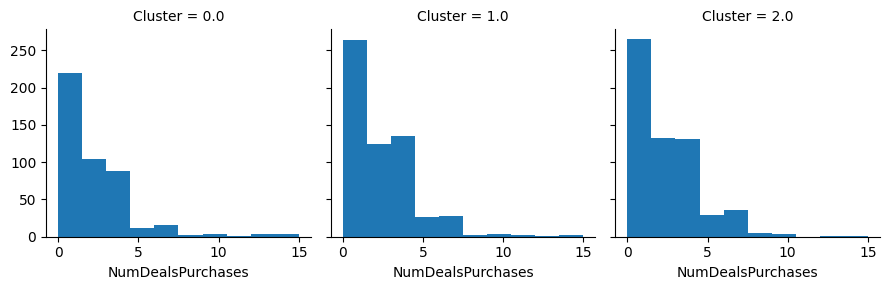

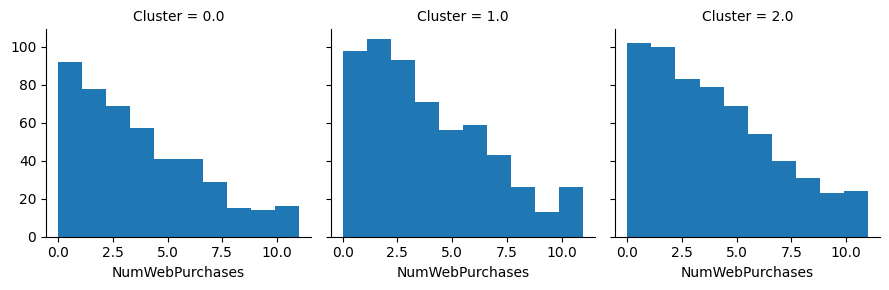

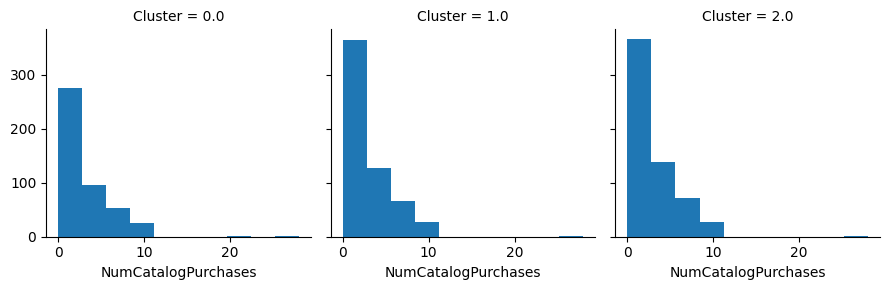

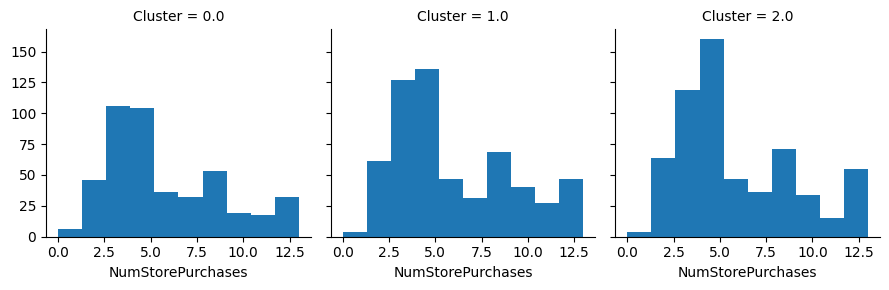

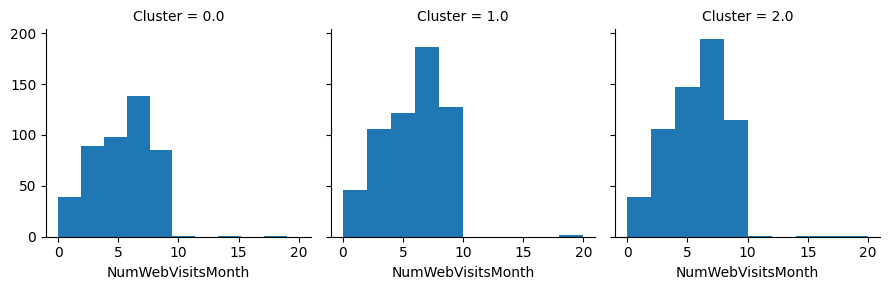

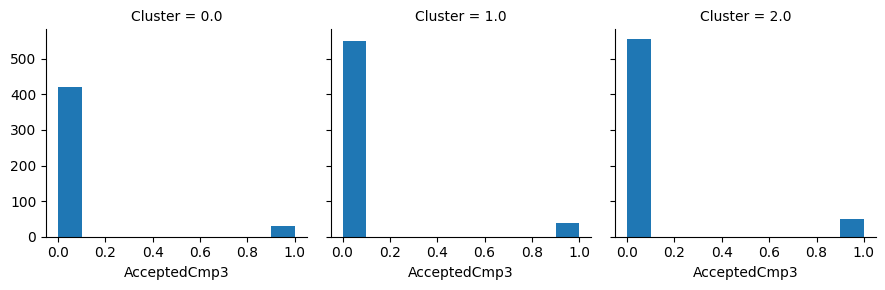

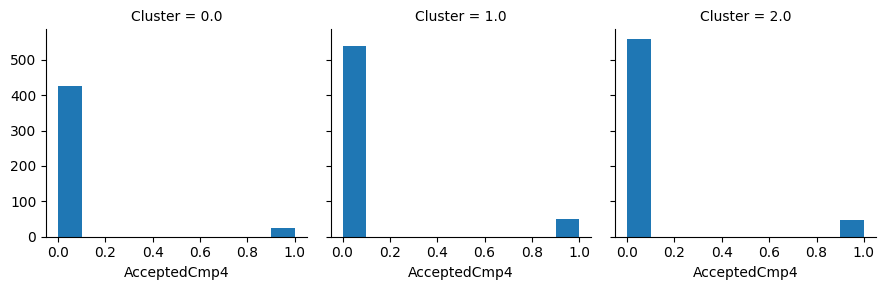

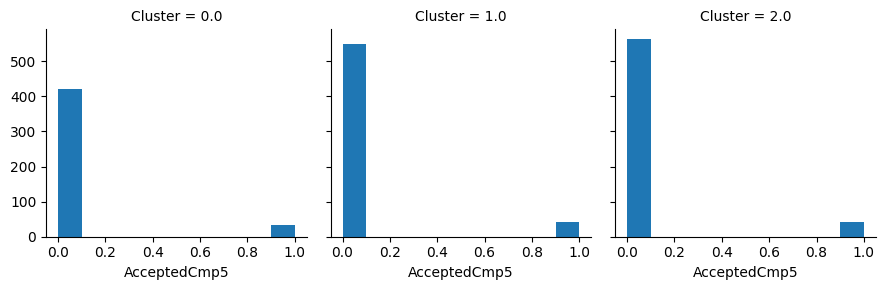

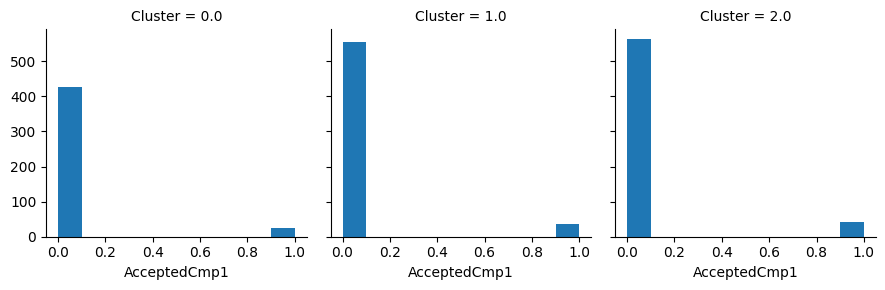

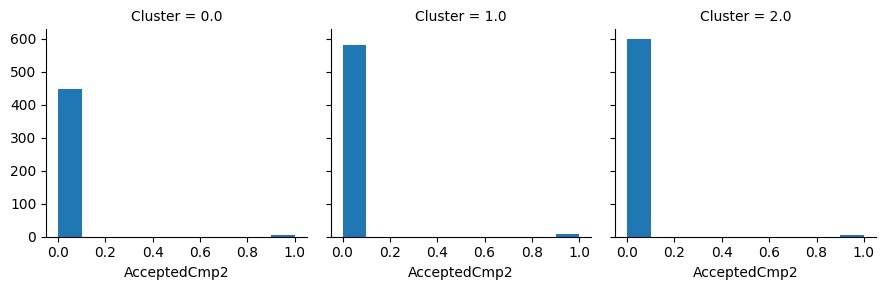

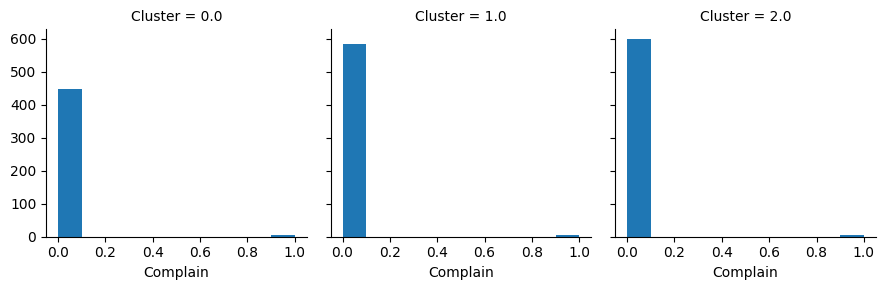

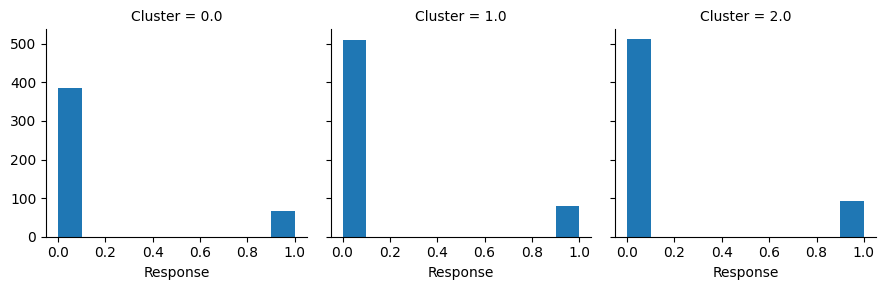

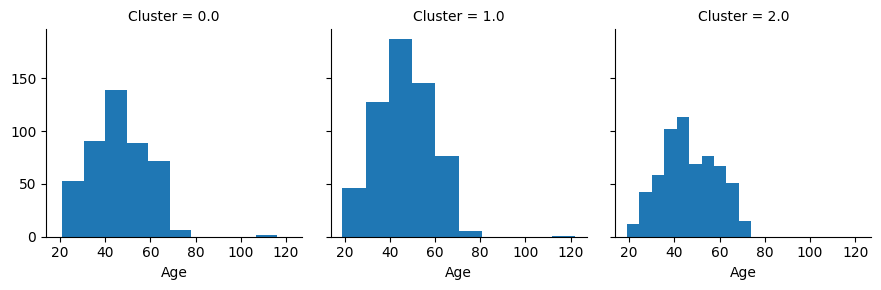

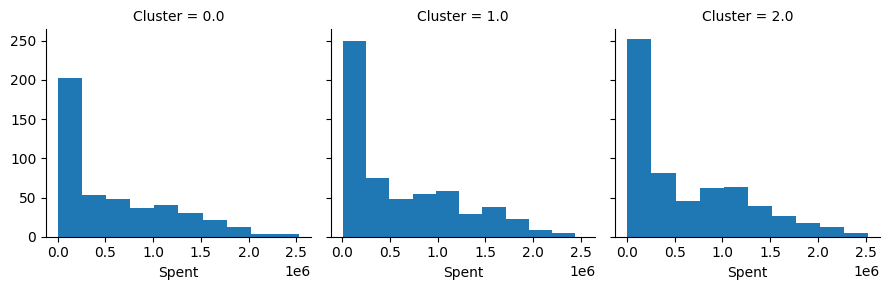

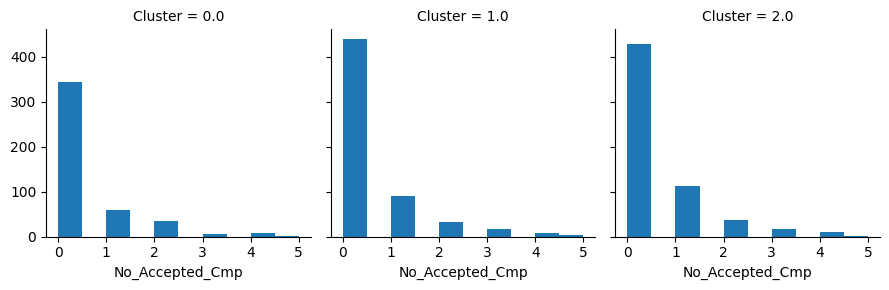

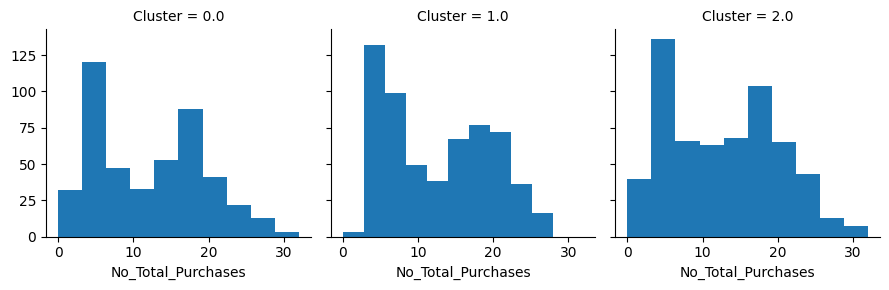

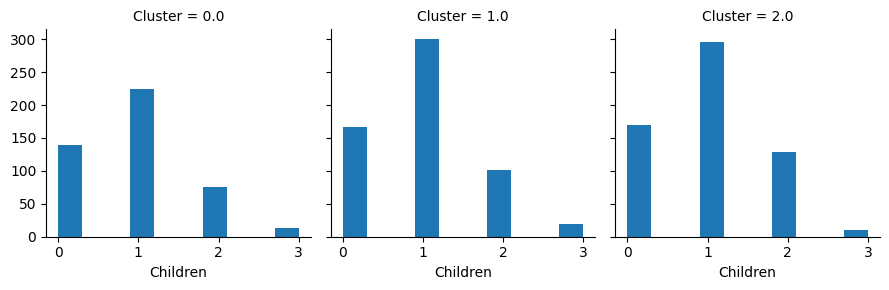

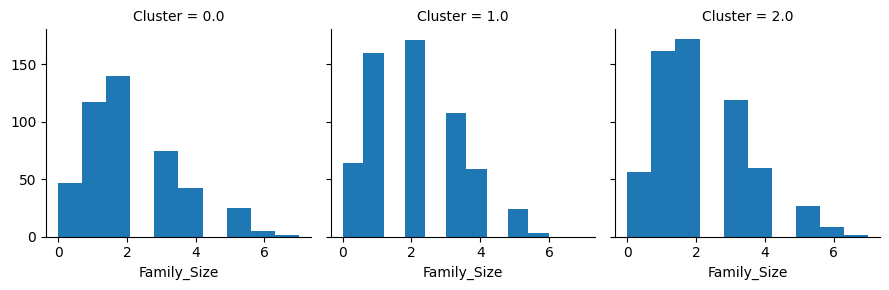

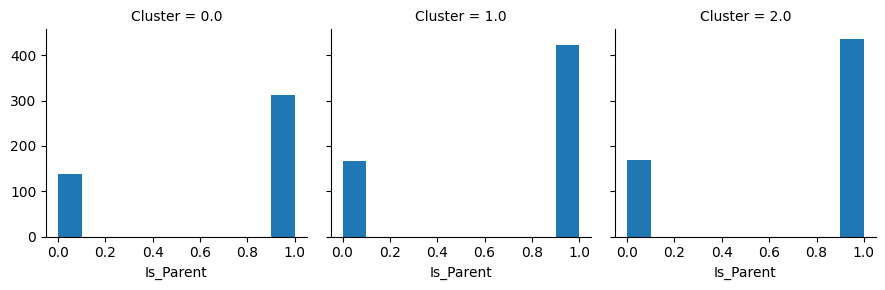

In [103]:
for c in cluster_df_cleaned.drop(['Cluster'],axis=1): 
    grid= sns.FacetGrid(cluster_df_cleaned,col='Cluster')
    grid= grid.map(plt.hist,c)
plt.show()

# silhouette_score

In [108]:
from sklearn.metrics import silhouette_score
labels =km.fit_predict(pd.DataFrame(df_PCA))
# Assuming 'X' is your data and 'labels' are the cluster labels assigned by your clustering algorithm
silhouette_avg = silhouette_score(df_PCA, labels)

print(f"The average silhouette_score is: {silhouette_avg}")

The average silhouette_score is: 0.5340094027913295


A score of 0.534 suggests that the clusters are reasonably well-defined.